In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/creditcard_cleaned.csv")


In [3]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}


🧠 Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

ROC-AUC Score: 0.9572835078037969


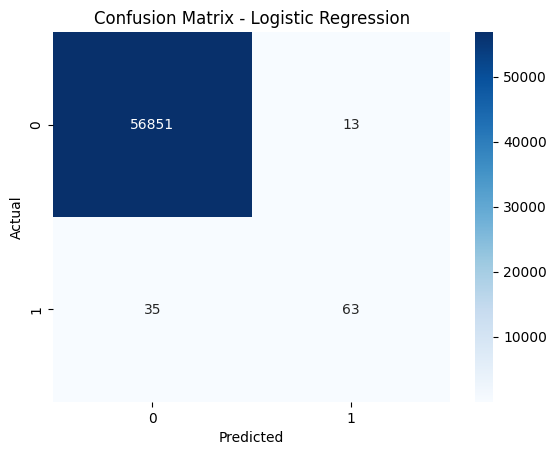


🧠 Model: Random Forest
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9310    0.8265    0.8757        98

    accuracy                         0.9996     56962
   macro avg     0.9654    0.9132    0.9377     56962
weighted avg     0.9996    0.9996    0.9996     56962

ROC-AUC Score: 0.9476152553030216


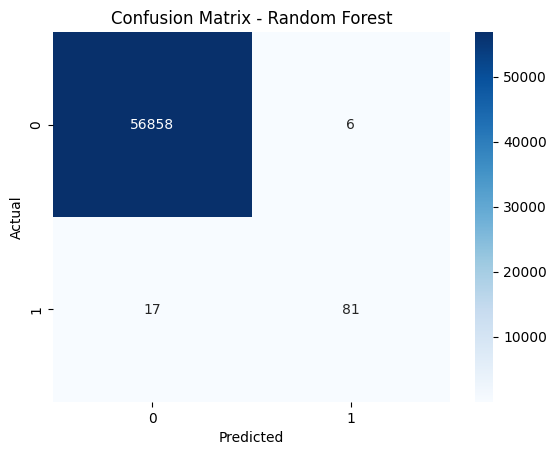

/home/foxtech/SHAHROZ_PROJ/Credit_Card_fraud_detection/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:26:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🧠 Model: XGBoost
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8667    0.7959    0.8298        98

    accuracy                         0.9994     56962
   macro avg     0.9332    0.8979    0.9148     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC-AUC Score: 0.9389517272862999


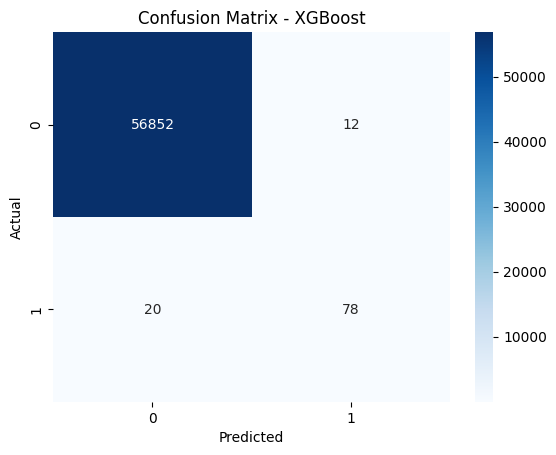

In [6]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n🧠 Model: {name}")
    print(classification_report(y_test, preds, digits=4))
    print("ROC-AUC Score:", roc_auc_score(y_test, proba))

    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()